In [13]:
## Packages
# data wrangling
import numpy as np
import pandas as pd
from scipy import stats
from dfply import *
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Settings
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  

### Data Import

In [14]:
inpt = pd.read_csv("../../../raw_data/Train_Inpatientdata-1542865627584.csv")
outpt = pd.read_csv("../../../raw_data/Train_Outpatientdata-1542865627584.csv")
bene = pd.read_csv("../../../raw_data/Train_Beneficiarydata-1542865627584.csv")
flag = pd.read_csv("../../../raw_data/Train-1542865627584.csv")

### Data Wrangling

In [11]:
# convert date columns to date format
def col_to_date(df, col_list) :
    for x in col_list:
        df[x] = pd.to_datetime(df[x])
    return df

bene = col_to_date(bene, ['DOB','DOD'])
inpt = col_to_date(inpt, ['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt'])
outpt = col_to_date(outpt, ['ClaimStartDt','ClaimEndDt'])

# calculate duration
inpt['ClaimDuration'] = inpt.ClaimEndDt - inpt.ClaimStartDt
inpt['HospitalDuration'] = inpt.DischargeDt - inpt.AdmissionDt
inpt['TotalPaid'] = inpt.DeductibleAmtPaid + inpt.InscClaimAmtReimbursed
outpt['ClaimDuration'] = outpt.ClaimEndDt - outpt.ClaimStartDt
outpt['TotalPaid'] = outpt.DeductibleAmtPaid + outpt.InscClaimAmtReimbursed

In [64]:
inpt.Provider.nunique()

2092

### Distributions

In [8]:
print('inpatient physicians', inpt.AttendingPhysician.nunique())
print('outpatient physicians', outpt.AttendingPhysician.nunique())
# overlap physicians for inpatient & outpatient
# [x for x in inpt.AttendingPhysician.unique() if x in outpt.AttendingPhysician.unique()]
print('in-out overlapping physicans', len(set(inpt.AttendingPhysician.unique()).intersection(outpt.AttendingPhysician.unique())))

inpatient physicians 11604
outpatient physicians 74109
in-out overlapping physicans 3651


In [9]:
# patients
print('inpatient beneficiary', inpt.BeneID.nunique())
print('outpatient beneficiary', outpt.BeneID.nunique())
print('in-out overlapping beneficiary', len(set(inpt.BeneID.unique()).intersection(outpt.BeneID.unique())))

inpatient beneficiary 31289
outpatient beneficiary 133980
in-out overlapping beneficiary 26713


In [10]:
# Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients, or do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.

In [11]:
test = inpt.groupby('AttendingPhysician')
test.get_group('PHY311147')

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
6991,BENE36364,CLM47465,2009-04-18,2009-04-20,PRV54337,3000,PHY311147,NaN,NaN,2009-04-18,78650,1068.0,2009-04-20,313,41401,4019,30000,3004,4139,5859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10700,BENE50418,CLM59069,2009-07-10,2009-07-11,PRV54337,0,PHY311147,NaN,NaN,2009-07-10,41401,1068.0,2009-07-11,OTH,27801,25541,V4581,27651,41401,2900,2948,56400,5789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15405,BENE67688,CLM74296,2009-11-01,2009-11-09,PRV54402,20000,PHY311147,NaN,NaN,2009-11-01,V5789,1068.0,2009-11-09,941,V5789,5856,25000,2724,4019,25060,V5413,V5419,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26510,BENE108215,CLM72119,2009-10-15,2009-10-23,PRV54337,6000,PHY311147,NaN,NaN,2009-10-15,496,1068.0,2009-10-23,164,49121,51883,2841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35334,BENE140846,CLM47306,2009-04-17,2009-04-26,PRV54337,12000,PHY311147,NaN,NaN,2009-04-17,4280,1068.0,2009-04-26,296,42830,4269,99591,4280,5854,4254,5693,25000,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36434,BENE144675,CLM35449,2009-01-25,2009-01-26,PRV54337,21000,PHY311147,PHY430456,NaN,2009-01-25,64883,1068.0,2009-01-26,779,64893,7840,78903,5559,64813,30560,5609,7823,NaN,NaN,734.0,NaN,NaN,NaN,NaN,NaN


'inpateint'

,provider_num,Physicians
0,1,11409
1,2,190
2,3,5


'outpatient'

,provider_num,Physicians
0,1,69523
1,2,4145
2,3,349
3,4,63
4,5,18
5,6,8
6,8,2
7,7,1


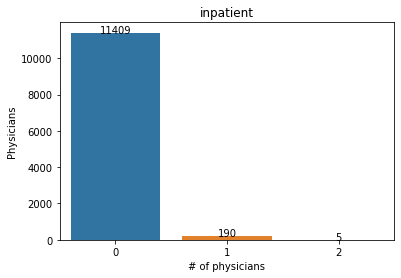

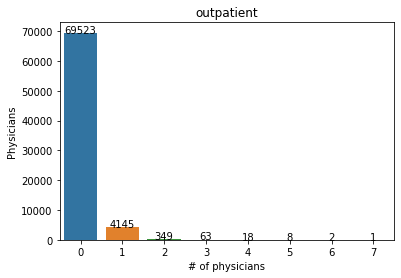

In [30]:
# doctors serve for diff providers
provider_per_doc_inpt = pd.DataFrame(inpt.groupby('AttendingPhysician').Provider.nunique().value_counts()).rename_axis('provider_num').reset_index().rename({'Provider': 'Physicians'},axis =1)
provider_per_doc_outpt = pd.DataFrame(outpt.groupby('AttendingPhysician').Provider.nunique().value_counts()).rename_axis('provider_num').reset_index().rename({'Provider': 'Physicians'},axis =1)

display('inpateint', provider_per_doc_inpt)
display('outpatient', provider_per_doc_outpt)

g = sns.barplot(x = provider_per_doc_inpt.index, y = "Physicians", data = provider_per_doc_inpt)
g.set(xlabel = "# of physicians")
g.set_title('inpatient')
for index, row in provider_per_doc_inpt.iterrows():
    g.text(row.name,row.Physicians, row.Physicians, color='black', ha="center")
plt.show()

k = sns.barplot(x = provider_per_doc_outpt.index, y = "Physicians", data = provider_per_doc_outpt)
for index, row in provider_per_doc_outpt.iterrows():
    k.text(row.name,row.Physicians, row.Physicians, color='black', ha="center")
k.set(xlabel = "# of physicians")
k.set_title('outpatient')
plt.show()

# check out the 5 physicians that work for 3 clinics 

In [63]:
# patients go to diff hospitals
inpt.groupby('BeneID').Provider.nunique().value_counts()

1    26694
2     3965
3      541
4       76
5       13
Name: Provider, dtype: int64

In [ ]:
inpt.groupby('AttendingPhysician').Provider.nunique().bar()
plt.xlabel('# of providers')
plt.ylabel('# of physicians')
plt.show()
# outpt.groupby('AttendingPhysician').Provider.nunique().hist(bins = 7)
# plt.xlabel('# of providers')
# plt.ylabel('# of physicians')
# plt.show()

,Provider
1,11409
2,190
3,5


1    69523
2     4145
3      349
4       63
5       18
6        8
8        2
7        1
Name: Provider, dtype: int64

1    69523
2     4145
3      349
4       63
5       18
6        8
8        2
7        1
Name: Provider, dtype: int64

In [18]:
inpt_bene = inpt.merge(bene, on = 'BeneID')

In [32]:
inpt_bene_cond = inpt_bene[inpt_bene.columns[inpt_bene.columns.str.contains(pat = 'ChronicCond')]].sum(axis=1).value_counts()

In [28]:
outpt_bene = outpt.merge(bene, on = 'BeneID')

In [31]:
outpt_bene_cond = outpt_bene[outpt_bene.columns[outpt_bene.columns.str.contains(pat = 'ChronicCond')]].sum(axis=1).value_counts()